<a href="https://colab.research.google.com/github/tsenga2/keio-quant-macro/blob/main/HPfilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

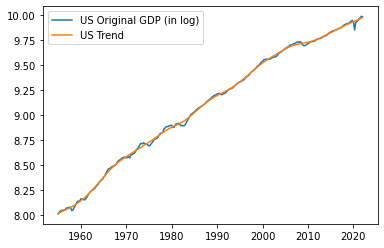

In [31]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

# set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'

# download the data from FRED using pandas_datareader
gdp = web.DataReader('GDPC1', 'fred', start_date, end_date)
log_gdp = np.log(gdp)

# calculate the quarterly percent change in real GDP
gdp_pct_change = gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_gdp, label="US Original GDP (in log)")

# Plot the trend component
plt.plot(trend, label="US Trend")

# Add a legend and show the plot
plt.legend()
plt.show()


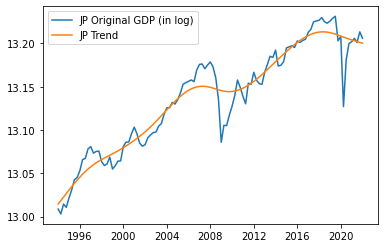

In [32]:
# set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'

# 日本のGDPデータを取得するためのFREDコード
japan_gdp_code = 'JPNRGDPEXP'

# 日本のGDPデータをFREDから取得
japan_gdp = web.DataReader(japan_gdp_code, 'fred', start_date, end_date)
log_japan_gdp = np.log(japan_gdp)

# calculate the quarterly percent change in real GDP
japan_gdp_pct_change = japan_gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
japan_cycle, japan_trend = sm.tsa.filters.hpfilter(log_japan_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_japan_gdp, label="JP Original GDP (in log)")

# Plot the trend component
plt.plot(japan_trend, label="JP Trend")

# Add a legend and show the plot
plt.legend()
plt.show()

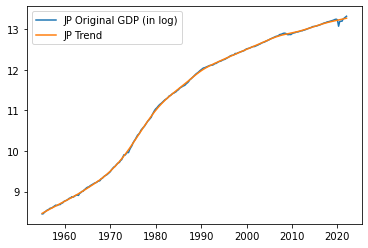

In [33]:
# イギリスのGDPデータを取得するためのFREDコード
uk_gdp_code = 'UKNGDP'  # または 'UKNGDP' など

# イギリスのGDPデータをFREDから取得
uk_gdp = web.DataReader(uk_gdp_code, 'fred', start_date, end_date)
log_uk_gdp = np.log(uk_gdp)

# calculate the quarterly percent change in real GDP
uk_gdp_pct_change = uk_gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
uk_cycle, uk_trend = sm.tsa.filters.hpfilter(log_uk_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_uk_gdp, label="JP Original GDP (in log)")

# Plot the trend component
plt.plot(uk_trend, label="JP Trend")

# Add a legend and show the plot
plt.legend()
plt.show()

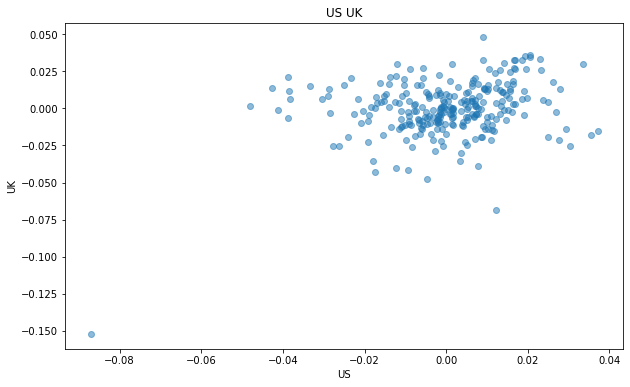

In [34]:
#米英間の相関関係(全期間)
plt.figure(figsize=(10, 6))
plt.scatter(cycle, uk_cycle, alpha=0.5)
plt.xlabel('US')
plt.ylabel('UK')
plt.title('US UK')
plt.show()

In [35]:
# 2008年以降のデータをフィルタリング
jp_cycle_filtered = japan_cycle[japan_cycle.index >= '1995-01-01']
uk_cycle_filtered = uk_cycle[uk_cycle.index >= '1995-01-01']

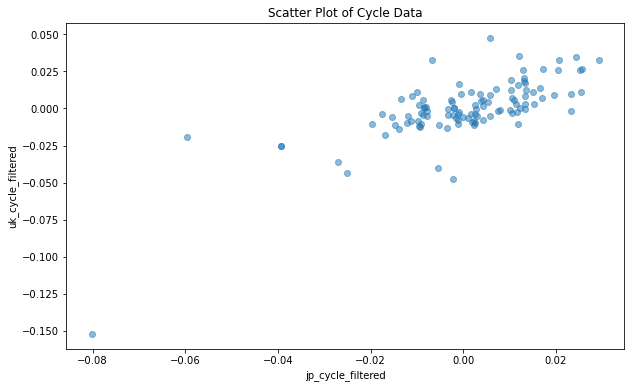

In [36]:
#日英間の相関関係(1995年以降)
plt.figure(figsize=(10, 6))
plt.scatter(jp_cycle_filtered, uk_cycle_filtered, alpha=0.5)
plt.xlabel('jp_cycle_filtered')
plt.ylabel('uk_cycle_filtered')
plt.title('Scatter Plot of Cycle Data')
plt.show()

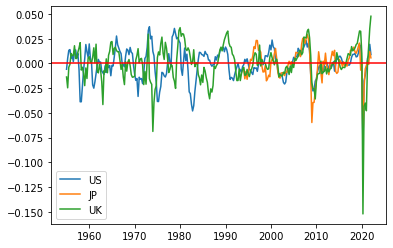

Cycle mean: 2.22691753513363e-13
Cycle standard deviation: 0.01538272676766542


In [37]:
# Plot the cycle component
plt.plot(cycle, label="US")
plt.plot(japan_cycle, label="JP")
plt.plot(uk_cycle, label="UK")
plt.axhline(0, color='red')
# Add a legend and show the plot
plt.legend()
plt.show()

cycle_mean = cycle.mean()
cycle_std = cycle.std()

print("Cycle mean:", cycle_mean)
print("Cycle standard deviation:", cycle_std)


In [38]:
#相関係数計算
correlation_coefficient = jp_cycle_filtered.corr(uk_cycle_filtered)
print("日本とイギリスの景気循環相関係数(1995年以降)")
print(correlation_coefficient)

日本とイギリスの景気循環相関係数(1995年以降)
0.7350716974619053
